In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [4]:
# download the names.txt file from github
!curl https://raw.githubusercontent.com/karpathy/makemore/master/names.txt > names.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  222k  100  222k    0     0   834k      0 --:--:-- --:--:-- --:--:--     0-:-- --:--:--  856k


In [10]:
words = [i.strip() for i in open("names.txt").readlines()]
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [11]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


Let's now generate a list of the context -> label ground truth

In [25]:

# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [15]:
C = torch.randn((27, 2))

In [16]:
C

tensor([[ 1.0092, -0.2482],
        [ 1.6462,  0.2015],
        [ 0.7020, -0.1893],
        [-0.9211,  0.2829],
        [-1.6005, -0.8815],
        [-0.8472, -0.6230],
        [ 0.7072, -0.1755],
        [-0.2810, -0.8718],
        [-0.5441,  0.6983],
        [-0.5627,  1.4940],
        [-1.5076,  0.1648],
        [-0.2198, -1.1483],
        [ 0.0613, -1.3509],
        [ 0.1748, -0.7712],
        [-1.3883, -0.1681],
        [-1.7123, -0.6539],
        [-0.2622,  0.1308],
        [ 1.6694, -0.4605],
        [-0.2624, -0.3586],
        [ 0.9371, -0.0582],
        [ 1.6952,  0.3649],
        [ 0.0552,  1.3118],
        [-0.6532,  0.2928],
        [-0.8494,  0.1629],
        [-0.4439, -0.4739],
        [-1.0881,  1.7223],
        [-0.9556, -1.6292]])

In [29]:
emb = C[X]

In [48]:
w1 = torch.randn((6,100))
b1 = torch.randn(100)

In [34]:
emb[1,:]

tensor([[ 1.0092, -0.2482],
        [ 1.0092, -0.2482],
        [-0.8472, -0.6230]])

In [46]:
# Embedding consists of a 32 x (3x2 ) list of embeddings
emb.shape

torch.cat(torch.unbind(emb,1),1)

tensor([[ 1.0092, -0.2482,  1.0092, -0.2482,  1.0092, -0.2482],
        [ 1.0092, -0.2482,  1.0092, -0.2482, -0.8472, -0.6230],
        [ 1.0092, -0.2482, -0.8472, -0.6230,  0.1748, -0.7712],
        [-0.8472, -0.6230,  0.1748, -0.7712,  0.1748, -0.7712],
        [ 0.1748, -0.7712,  0.1748, -0.7712,  1.6462,  0.2015],
        [ 1.0092, -0.2482,  1.0092, -0.2482,  1.0092, -0.2482],
        [ 1.0092, -0.2482,  1.0092, -0.2482, -1.7123, -0.6539],
        [ 1.0092, -0.2482, -1.7123, -0.6539,  0.0613, -1.3509],
        [-1.7123, -0.6539,  0.0613, -1.3509, -0.5627,  1.4940],
        [ 0.0613, -1.3509, -0.5627,  1.4940, -0.6532,  0.2928],
        [-0.5627,  1.4940, -0.6532,  0.2928, -0.5627,  1.4940],
        [-0.6532,  0.2928, -0.5627,  1.4940,  1.6462,  0.2015],
        [ 1.0092, -0.2482,  1.0092, -0.2482,  1.0092, -0.2482],
        [ 1.0092, -0.2482,  1.0092, -0.2482,  1.6462,  0.2015],
        [ 1.0092, -0.2482,  1.6462,  0.2015, -0.6532,  0.2928],
        [ 1.6462,  0.2015, -0.6532,  0.2

In [52]:
h = torch.tanh(emb.view(32,6)@w1)+b1
h

tensor([[ 1.7992,  0.7389, -1.8302,  ...,  0.7882, -0.7870, -2.3990],
        [ 3.0923,  0.7309, -2.1576,  ...,  0.9293,  0.9363, -2.6786],
        [ 1.2285,  0.7299, -2.2582,  ...,  1.1815, -0.4593, -2.6804],
        ...,
        [ 2.6767,  2.7250, -0.2594,  ..., -0.7282,  0.9944, -0.6849],
        [ 1.1610,  2.7242, -0.3324,  ...,  0.3415,  0.9801, -0.6859],
        [ 1.1240,  2.6934, -0.2754,  ..., -0.8174, -0.9219, -0.6933]])

In [53]:
w2 = torch.rand((100,27))
b2 = torch.rand(27)

In [54]:
logits = h @ w2 + b2

In [55]:
counts = logits.exp()

In [57]:
prob = counts / counts.sum(1,keepdims=True)

In [61]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(7.4314)

First Network Prototype

In [62]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad=True

In [63]:
sum(p.nelement() for p in parameters)

11897

In [67]:
for p in parameters:
    p.requires_grad=True

In [74]:

for _ in range(1000):
    emb = C[X] # (32, 3, 10)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    for p in parameters:
        p.data += -0.01 * p.grad
    
        
      

2.1035280227661133
2.060115098953247
2.017028331756592
1.9743014574050903
1.931983232498169
1.8901208639144897
1.8487598896026611
1.8079452514648438
1.7677085399627686
1.7280762195587158
1.689066767692566
1.6506943702697754
1.6129730939865112
1.5759220123291016
1.5395665168762207
1.5039477348327637
1.4691236019134521
1.4351654052734375
1.4021599292755127
1.3701971769332886
1.3393559455871582
1.3096880912780762
1.2812106609344482
1.253899335861206
1.2276908159255981
1.202500581741333
1.1782304048538208
1.1547856330871582
1.1320761442184448
1.110026478767395
1.0885722637176514
1.0676605701446533
1.0472493171691895
1.0273059606552124
1.007802128791809
0.9887195229530334
0.9700402021408081
0.9517533779144287
0.9338480234146118
0.9163155555725098
0.8991490006446838
0.882343053817749
0.8658906817436218
0.8497846722602844
0.8340187072753906
0.8185832500457764
0.8034700155258179
0.7886685729026794
0.7741669416427612
0.7599540948867798
0.7460154294967651
0.732337474822998
0.7189075350761414
0.7

In [82]:

# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [84]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad=True

In [97]:

for _ in range(10000):
    ix = torch.randint(0,X.shape[0],(32,))
    emb = C[X[ix]] # (32, 3, 10)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    for p in parameters:
        p.data += -0.01 * p.grad



In [98]:
emb = C[X] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
print(loss) 

tensor(2.2477, grad_fn=<NllLossBackward0>)


Eventually we can do what is known as learning rate decay, whereby we reduce the learning rate by a factor of 10 after we achieve a substantial decrease in the loss

However, we need to consider the fact that our model's reduced loss might be due to overfitting. Hence, we need to consider the use of a training test validation split.

In [99]:
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [105]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [106]:

for p in parameters:
  p.requires_grad = True
    
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

lri = []
lossi = []
stepi = []

for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())


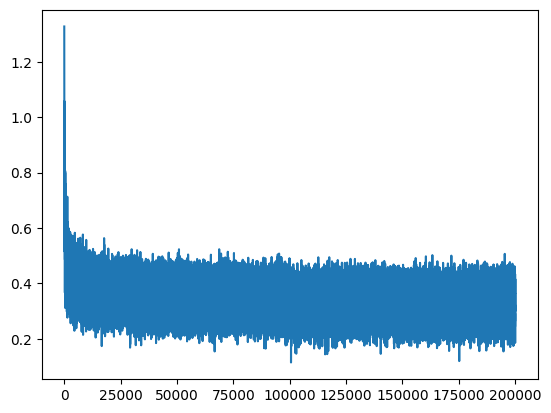

In [107]:
plt.plot(stepi, lossi)


In [108]:
loss

tensor(1.9407, grad_fn=<NllLossBackward0>)

In [109]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1814, grad_fn=<NllLossBackward0>)

Now we increase the size of the neural net so that we get more features

In [110]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [111]:

for p in parameters:
  p.requires_grad = True
    
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

lri = []
lossi = []
stepi = []

for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())


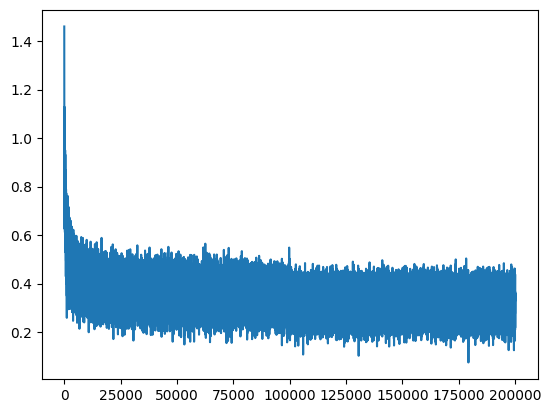

In [112]:
plt.plot(stepi, lossi)

In [113]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1563, grad_fn=<NllLossBackward0>)